# Montu Python 
## Astronomical ephemerides for the Ancient World
## Test: Coordinates


In [479]:
# Montu packages and data
from montu import *

# These magic commands are intended to allow updating the packages if they change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [480]:
ALL_STARS.data.columns

Index(['StarID', 'Hip', 'HD', 'HR', 'Gliese', 'BayerFlamsteed', 'ProperName',
       'RAJ2000', 'DecJ2000', 'Distance', 'Mag', 'AbsMag', 'Spectrum',
       'ColorIndex'],
      dtype='object')

In [481]:
aldebaran = ALL_STARS.get_stars(ProperName='Aldebaran')
aldebaran.data

,StarID,Hip,HD,HR,Gliese,BayerFlamsteed,ProperName,RAJ2000,DecJ2000,Distance,Mag,AbsMag,Spectrum,ColorIndex
15107,15108,21421,29139.0,1457.0,Gl 171.1A,87Alp Tau,Aldebaran,4.59866679000000023,16.50976164000000068,19.96406468356959962,0.87,-0.63124484155242799,K5III,1.53800000000000003


In [482]:
ALL_STARS.get_stars(RAJ2000=[1,2]).data

,StarID,Hip,HD,HR,Gliese,BayerFlamsteed,ProperName,RAJ2000,DecJ2000,Distance,Mag,AbsMag,Spectrum,ColorIndex
3265,3266,4674,5747.0,NaN,NaN,NaN,NaN,1.00076816999999996,60.51000064000000123,145.13788098693800066,7.08999999999999986,1.28109610953812991,G8II,0.96899999999999997
3266,3267,4675,5788.0,282.0,NaN,NaN,NaN,1.00098532000000007,44.71330426000000102,128.86597938144299746,5.69000000000000039,0.13930860629094299,B9.5Vn,-0.01000000000000000
3267,3268,4676,5861.0,NaN,NaN,NaN,NaN,1.00101358999999990,-2.01891577000000000,91.07468123861569609,7.34999999999999964,2.55301170057036986,F5,0.46000000000000002
3268,3269,4677,5859.0,NaN,NaN,NaN,NaN,1.00156991999999989,2.63298132999999979,378.78787878787898080,7.62000000000000011,-0.27198036565084399,K2,1.50299999999999989
3269,3270,4679,232341.0,NaN,NaN,NaN,NaN,1.00230930000000007,55.29066293000000343,740.74074074074098917,8.86999999999999922,-0.47833115752497002,B9,0.07099999999999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85905,85906,0,NaN,NaN,NN 3119,NaN,NaN,1.85062555646462990,-6.11559415849939025,10.00000000000000000,14.59999999999999964,14.59999999999999964,m,NaN
85906,85907,0,NaN,NaN,NN 3120,NaN,NaN,1.85651355992470002,21.39935041260130077,17.85714285714290028,13.90000000000000036,12.64094013503100022,M4,NaN
85907,85908,0,NaN,NaN,Gl 81 B,NaN,NaN,1.93168084288376996,-51.61203560616610275,17.48557440111909855,10.69999999999999929,9.48660048273336010,NaN,NaN
85908,85909,0,NaN,NaN,Gl 81.1B,NaN,NaN,1.95353105306032004,-10.24579527747789953,33.97893306150189829,11.21000000000000085,8.55395131049806068,m,1.37999999999999989


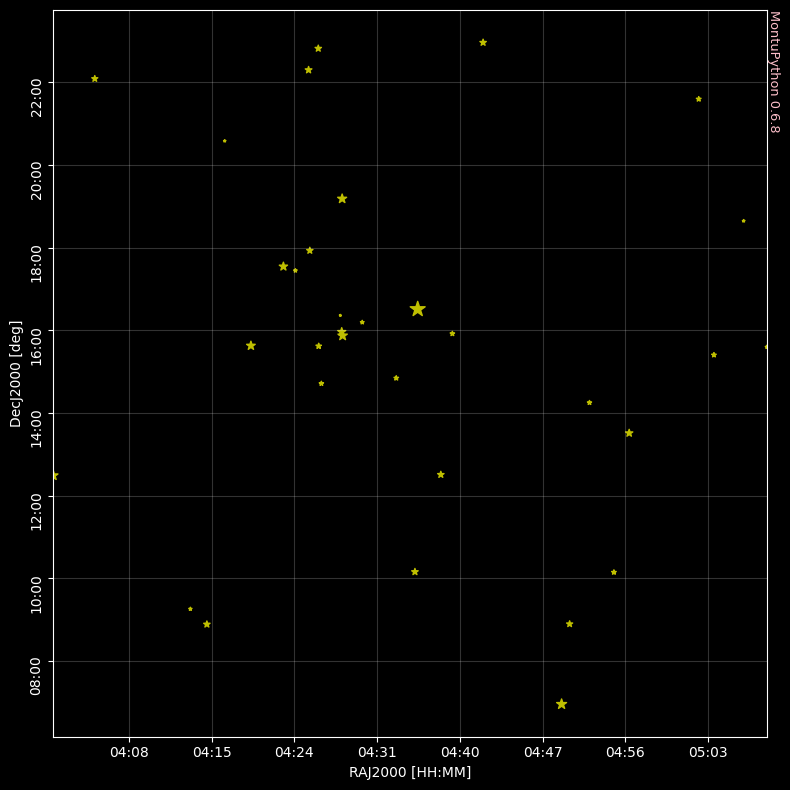

In [483]:
aldebaran = ALL_STARS.get_stars(ProperName='Aldebaran')
hyades = ALL_STARS.get_stars_area(RA=aldebaran.data.RAJ2000,Dec=aldebaran.data.DecJ2000,
                                  suffix='J2000',radius=10,Mag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=False,figargs=dict(figsize=(8,8)))

In [484]:
from montu import *
earth = PlanetaryBody('Earth')
tebas = ObservingSite(planet=earth,lon=33,lat=24,height=0)

In [485]:
mtime = MonTime('-2500-01-01 12:00:00')
tebas.update_site(mtime)
print(tebas.epoch.datepro)
tebas.update_site(mtime + 10*DAY)
print(tebas.epoch.datepro)
tebas.update_site(mtime + 10*DAY)
print(tebas.epoch.datepro)

-2500-01-01 12:00:00.0002
-2500-01-11 12:00:00.0001
-2500-01-11 12:00:00.0001


In [487]:
%timeit tebas.update_site(mtime + 10*DAY)

1.29 ms ± 69.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [488]:
from montu import *
Montu.load_kernels(PRECISION_KERNELS)
earth = PlanetaryBody('Earth')
tebas = ObservingSite(planet=earth,lon=33,lat=24,height=0)
mtime = MonTime('-2500-01-01 12:00:00')
mars = PlanetaryBody('Mars')
mars.reset_store()
mars.calculate_sky_position(mtime,tebas,method='SPICE',store=1)

Computing position of body 'mars' at epoch: jtd = 807954.69096852 
Method 'SPICE':
	Position Epoch: prolectic gregorian -2500-01-01 12:00:00.0002, JED = 807954.0
	Coordinates @ J2000: 
		Equatorial: 12:31:48.754 01:37:12.184
		Ecliptic: 186:39:46.949 04:38:36.308
	Coordinates @ Epoch : 
		Equatorial: 08:32:9.796 24:06:28.555
		Ecliptic: 124:21:21.542 04:39:5.339
	Observing conditions: 
		Distance to site [au]:  0.660450348835636
		Distance to sun [au]:  1.626114972997512
		Solar elongation [deg]:  157:49:18.876
		Phase angle [deg]:  13:21:31.981
		Magnitude:  -1.1
	Other properties: 
		Local true sidereal time:  20:52:25.323
		Hour angle @ Epoch:  12:20:15.527
		Local coordinates @ Epoch:  06:11:24.275 -41:38:31.094


In [489]:
SkyCoordinates.to_altaz(mars.df,tebas,mtime)[['az_comp','el_comp']]

,az_comp,el_comp
0,6.19007652077834969,-41.64197048578358817


In [490]:
%timeit SkyCoordinates.to_altaz(mars.df,tebas,mtime)[['az_comp','el_comp']]

1.08 ms ± 81.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [491]:
mars.df.columns

Index(['datepro', 'datemix', 'datetime64', 'tt', 'jtd', 'jed', 'RAJ2000',
       'DecJ2000', 'RAEpoch', 'DecEpoch', 'LonJ2000', 'LatJ2000', 'LonEpoch',
       'LatEpoch', 'tsa', 'HA', 'az', 'el', 'site_distance', 'sun_distance',
       'elongation', 'phase', 'mag', 'RAJ2000_SPICE', 'DecJ2000_SPICE',
       'RAEpoch_SPICE', 'DecEpoch_SPICE', 'LonJ2000_SPICE', 'LatJ2000_SPICE',
       'LonEpoch_SPICE', 'LatEpoch_SPICE', 'tsa_SPICE', 'HA_SPICE', 'az_SPICE',
       'el_SPICE', 'site_distance_SPICE', 'sun_distance_SPICE',
       'elongation_SPICE', 'phase_SPICE', 'mag_SPICE'],
      dtype='object')

In [492]:
SkyCoordinates.to_altaz(mars.df,tebas,mtime,inplace=True)

In [493]:
mars.df.columns

Index(['datepro', 'datemix', 'datetime64', 'tt', 'jtd', 'jed', 'RAJ2000',
       'DecJ2000', 'RAEpoch', 'DecEpoch', 'LonJ2000', 'LatJ2000', 'LonEpoch',
       'LatEpoch', 'tsa', 'HA', 'az', 'el', 'site_distance', 'sun_distance',
       'elongation', 'phase', 'mag', 'RAJ2000_SPICE', 'DecJ2000_SPICE',
       'RAEpoch_SPICE', 'DecEpoch_SPICE', 'LonJ2000_SPICE', 'LatJ2000_SPICE',
       'LonEpoch_SPICE', 'LatEpoch_SPICE', 'tsa_SPICE', 'HA_SPICE', 'az_SPICE',
       'el_SPICE', 'site_distance_SPICE', 'sun_distance_SPICE',
       'elongation_SPICE', 'phase_SPICE', 'mag_SPICE', 'HA_comp', 'az_comp',
       'el_comp'],
      dtype='object')

In [495]:
SkyCoordinates.precess_coordinates(mars.df,mtime,inplace=True)
mars.df.columns

Index(['datepro', 'datemix', 'datetime64', 'tt', 'jtd', 'jed', 'RAJ2000',
       'DecJ2000', 'RAEpoch', 'DecEpoch', 'LonJ2000', 'LatJ2000', 'LonEpoch',
       'LatEpoch', 'tsa', 'HA', 'az', 'el', 'site_distance', 'sun_distance',
       'elongation', 'phase', 'mag', 'RAJ2000_SPICE', 'DecJ2000_SPICE',
       'RAEpoch_SPICE', 'DecEpoch_SPICE', 'LonJ2000_SPICE', 'LatJ2000_SPICE',
       'LonEpoch_SPICE', 'LatEpoch_SPICE', 'tsa_SPICE', 'HA_SPICE', 'az_SPICE',
       'el_SPICE', 'site_distance_SPICE', 'sun_distance_SPICE',
       'elongation_SPICE', 'phase_SPICE', 'mag_SPICE', 'HA_comp', 'az_comp',
       'el_comp', 'RAEpoch_comp', 'DecEpoch_comp'],
      dtype='object')

In [496]:
obj = pd.Series(dict(DecEpoch=mars.DecEpoch,RAEpoch=mars.RAEpoch))
obj

DecEpoch    24.10793190255713725
RAEpoch      8.53605441277297849
dtype: float64

In [497]:
SkyCoordinates.to_altaz(obj,tebas,mtime)

,DecEpoch,RAEpoch
0,24.10793190255713725,8.53605441277297849


In [499]:
obj

DecEpoch    24.10793190255713725
RAEpoch      8.53605441277297849
dtype: float64

In [500]:
SkyCoordinates.to_altaz(obj,tebas,mtime,inplace=True)
obj

DecEpoch    24.10793190255713725
RAEpoch      8.53605441277297849
HA          12.33764631003869816
az           6.19007652077834969
el         -41.64197048578358817
HA_comp     12.33764631003869816
az_comp      6.19007652077834969
el_comp    -41.64197048578358817
dtype: float64

## Precess stars

In [501]:
from montu import *
Montu.load_kernels(PRECISION_KERNELS)
earth = PlanetaryBody('Earth')
tebas = ObservingSite(planet=earth,lon=33,lat=24,height=0)
mtime = MonTime('-2500-01-01 12:00:00')

In [502]:
SkyCoordinates.precess_coordinates(ALL_STARS.data,mtime,bar=True)

100%|██████████| 87475/87475 [01:00<00:00, 1452.81it/s]


,StarID,Hip,HD,HR,Gliese,BayerFlamsteed,ProperName,RAJ2000,DecJ2000,Distance,Mag,AbsMag,Spectrum,ColorIndex,RAEpoch,DecEpoch,RAEpoch_comp,DecEpoch_comp
0,1,2,224690.0,NaN,NaN,NaN,NaN,0.00025315000000000,-19.49883744999999990,45.66210045662099759,9.26999999999999957,5.97222057420059027,K3V,0.99900000000000000,19.63801287781020122,-39.97541218501313409,19.63801287781020122,-39.97541218501313409
1,2,3,224699.0,NaN,NaN,NaN,NaN,0.00033386000000000,38.85928607999999684,355.87188612099600959,6.61000000000000032,-1.14646840047459997,B9,-0.01900000000000000,20.53243392784487753,17.02694033261830953,20.53243392784487753,17.02694033261830953
2,3,4,224707.0,NaN,NaN,NaN,NaN,0.00055878000000000,-51.89354612000000344,129.03225806451598601,8.06000000000000050,2.50650851253154983,F0V,0.37000000000000000,18.04389619364439667,-69.86090453021374458,18.04389619364439667,-69.86090453021374458
3,4,5,224705.0,NaN,NaN,NaN,NaN,0.00066435000000000,-40.59122440000000154,348.43205574912900602,8.55000000000000071,0.83940948366996304,G8III,0.90200000000000002,18.91884527505292368,-59.96067075935225432,18.91884527505292368,-59.96067075935225432
4,5,9,224708.0,NaN,NaN,NaN,NaN,0.00235612000000000,36.58593777000000102,207.90020790020798813,8.58999999999999986,2.00072538186915994,G5,1.06699999999999995,20.50134942156241991,14.79811635896202660,20.50134942156241991,14.79811635896202660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87470,87471,0,NaN,NaN,NN 4385,NaN,NaN,23.99576657167050087,47.76502088475189822,16.72240802675590032,16.10000000000000142,14.98350591994210035,m,1.87000000000000011,20.66621274243414064,25.73514759308118727,20.66621274243414064,25.73514759308118727
87471,87472,0,NaN,NaN,NN 4386,NaN,NaN,23.99623552608800026,-44.07164577524810056,18.51851851851850128,12.82000000000000028,11.48196879911479940,M7,1.63999999999999990,18.70789254027188520,-63.09869639345456704,18.70789254027188520,-63.09869639345456704
87472,87473,0,NaN,NaN,NN 4387,NaN,NaN,23.99672272569850051,-34.10331194355489970,12.82051282051279983,12.80000000000000071,12.26047301345239937,M4,NaN,19.20625162851325740,-53.91034687928420510,19.20625162851325740,-53.91034687928420510
87473,87474,0,NaN,NaN,Gl 914 B,NaN,NaN,0.03516213542816970,27.09504112338469994,12.40233163834800045,9.00000000000000000,8.53248329899676072,K6 V,NaN,20.39952069999468875,5.41753172979235664,20.39952069999468875,5.41753172979235664


In [503]:
selection = ALL_STARS.get_stars(Mag = [-2,3])
len(selection.data)

179

In [504]:
from montu import *
Montu.load_kernels(PRECISION_KERNELS)
earth = PlanetaryBody('Earth')
tebas = ObservingSite(planet=earth,lon=33,lat=24,height=0)
mtime = MonTime('-2500-01-01 12:00:00')
SkyCoordinates.precess_coordinates(selection.data,mtime,inplace=True,bar=True)
SkyCoordinates.to_altaz(selection.data,tebas,mtime,inplace=True,bar=True)

  0%|          | 0/179 [00:00<?, ?it/s]

100%|██████████| 179/179 [00:00<00:00, 1240.34it/s]


In [505]:
star = selection.get_stars(ProperName = 'Sirius')
star.data

,StarID,Hip,HD,HR,Gliese,BayerFlamsteed,ProperName,RAJ2000,DecJ2000,Distance,...,RAEpoch,DecEpoch,RAEpoch_comp,DecEpoch_comp,HA,az,el,HA_comp,az_comp,el_comp
23439,23440,32349,48915.0,2491.0,Gl 244 A,9Alp CMa,Sirius,6.75256939999999961,-16.71314306000000016,2.63706125893305021,...,3.46849440548147836,-22.49260181907088096,3.46849440548147836,-22.49260181907088096,17.40520631733019741,107.69502076475953345,-16.64883804867731243,17.40520631733019741,107.69502076475953345,-16.64883804867731243


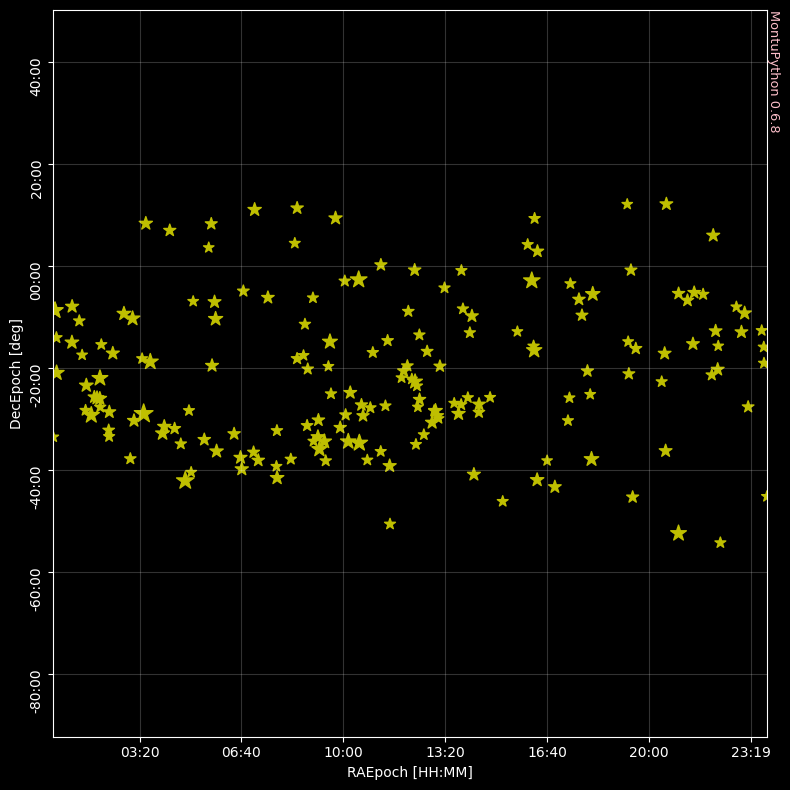

In [506]:
fig,ax = selection.plot_stars(suffix='Epoch',pad=0.0,labels=False,figargs=dict(figsize=(8,8)))

In [507]:
star = selection.get_stars(ProperName = 'Sirius')
print(f"""{star.data.iloc[0].ProperName} Coordinates:
=======================
{mtime}

Coordinates
=======================
J2000 = {D2H(star.data.RAJ2000)} / {D2H(star.data.DecJ2000)}
Epoch = {D2H(star.data.RAEpoch)} / {D2H(star.data.DecEpoch)}
Hour angle = {D2H(star.data.HA)}
AzAlt = {D2H(star.data.az)} / {D2H(star.data.el)}
""")

Sirius Coordinates:
Montu Time Object:
--------------------------
Date in proleptic UTC: -2500-01-01 12:00:00.0002
Date in mixed UTC: -2500-01-22 12:00:00
Date in SPICE format: 2501 B.C. 01-01 12:00:00.200
General:
    Components: [-1, 2500, 1, 1, 12, 0, 0, 200]
    Is bce: True
    Is Julian: True
Uniform scales:
    Terrestrial time:
        tt: -142006202700.3199
        jtd: 807954.69096852
    UTC time:
        et: -142006262399.99988
        jed: 807954.0
    Delta-t = TT - UTC = 59699.68000000001
Objects:
    Date in datetime64 format: -2500-01-01T12:00:00.000200
    Date in PyPlanet Epoch: 807954.0
    Date in PyEphem Epoch: -2501/1/22 12:00:00
    Date in AstroPy Time: 807954.69096852
Astronomical properties at Epoch:
    True obliquity of ecliptic: 23:58:33.587
    True nutation longitude: 00:00:10.214
    Greenwhich Meridian Sidereal Time: 18:40:25.323


Coordinates
J2000 = 06:45:9.250 / -16:42:47.315
Epoch = 03:28:6.580 / -22:29:33.367
Hour angle = 17:24:18.743
AzAlt = 107:

## Create a map in Epoch Coordinates:

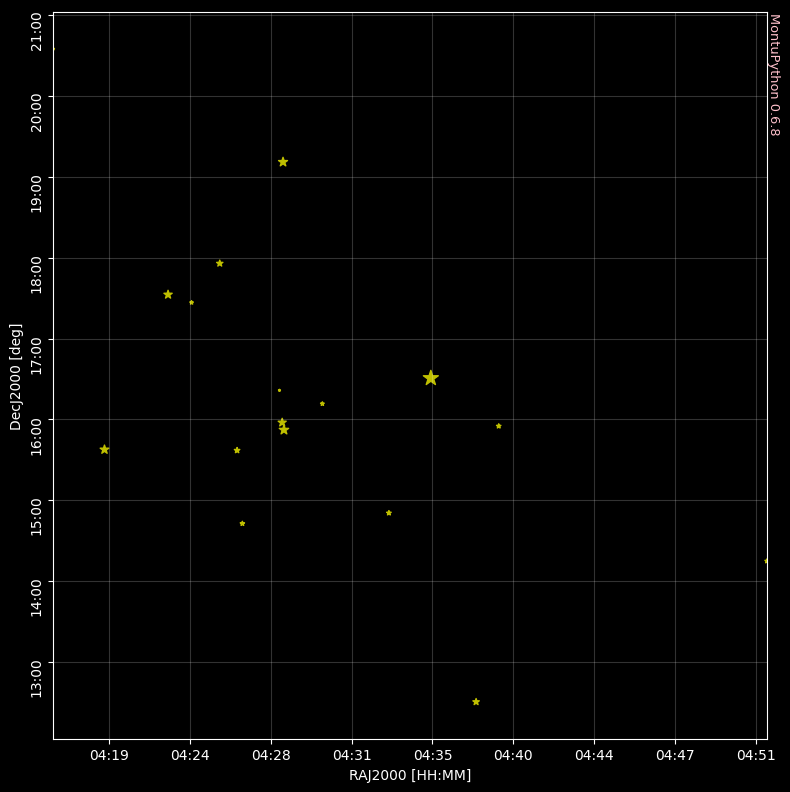

In [508]:
star = ALL_STARS.get_stars(ProperName='Aldebaran')
area = ALL_STARS.get_stars_area(RA=star.data.RAJ2000,Dec=star.data.DecJ2000,
                                suffix='J2000',radius=5,Mag=[-2,5])
fig,ax = area.plot_stars(pad=0.0,labels=False,figargs=dict(figsize=(8,8)))

In [509]:
SkyCoordinates.precess_coordinates(area.data,mtime,inplace=True,bar=True)

100%|██████████| 17/17 [00:00<00:00, 611.71it/s]


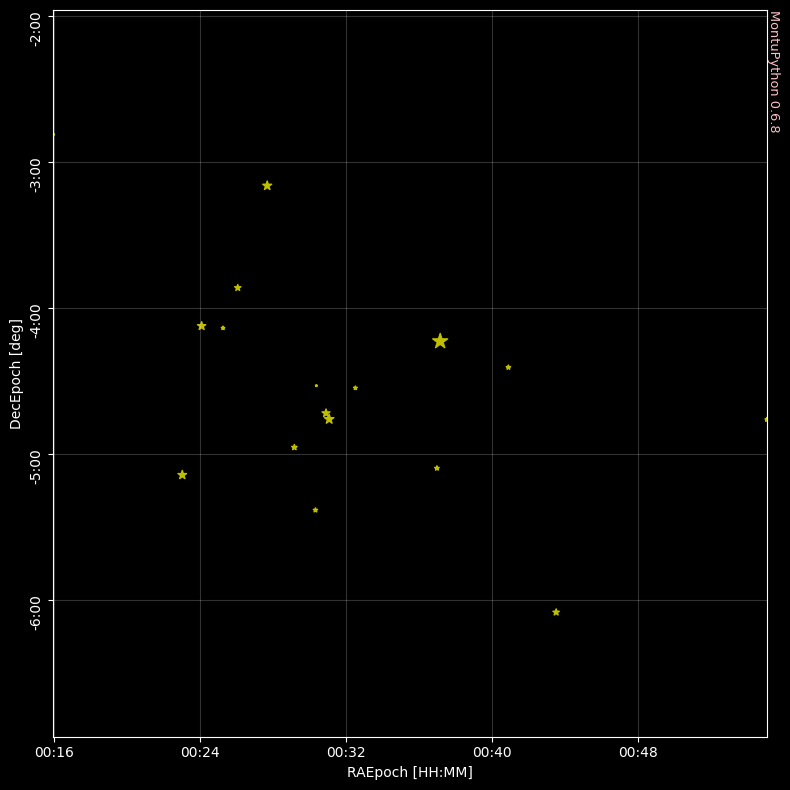

In [510]:
fig,ax = area.plot_stars(suffix='Epoch',pad=0.0,labels=False,figargs=dict(figsize=(8,8)))

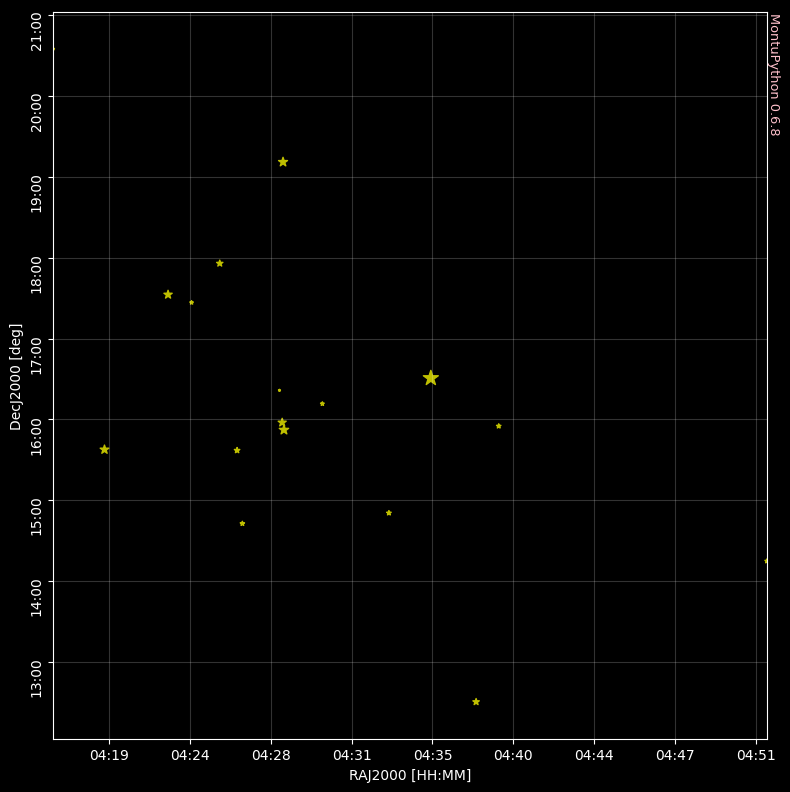

In [511]:
fig,ax = area.plot_stars(suffix='J2000',pad=0.0,labels=False,figargs=dict(figsize=(8,8)))

## Propagate during several days

In [518]:
from montu import *
mtime = MonTime('-2500-01-01 12:00:00')
Montu.load_kernels(PRECISION_KERNELS)
earth = PlanetaryBody('Earth')
tebas = ObservingSite(planet=earth,lon=33,lat=24,height=0)

In [519]:
star = ALL_STARS.get_stars(ProperName='Aldebaran')
area = ALL_STARS.get_stars_area(RA=star.data.RAJ2000,Dec=star.data.DecJ2000,
                                suffix='J2000',radius=5,Mag=[-2,5])

In [520]:
SkyCoordinates.precess_coordinates(star.data,mtime,inplace=True)

In [466]:
mtime = MonTime('-2000-01-01 12:00:00',scale='tt')
tai2sid = MonTime.tai_to_sid(mtime)
daily_df = SkyCoordinates.daily_motion(star.data,tebas,mtime,duration=100*DAY,deltat=1*DAY,tai2sid=tai2sid)
daily_df

,tt,HA,az,el
0,-126227808000.0,7.23624325556572323,275.42800309233916778,-17.92249396838808906
1,-126227721600.0,7.30195200540426015,275.85830712539433307,-18.81854752361516603
2,-126227635200.0,7.36766075524279529,276.29251816395185415,-19.71390764582930899
3,-126227548800.0,7.43336950508133043,276.73091134317098749,-20.60851617228598798
4,-126227462400.0,7.49907825491986557,277.17377106347180415,-21.50231300871219986
...,...,...,...,...
96,-126219513600.0,13.54428324006494222,49.60864647639316161,-58.93557250408263570
97,-126219427200.0,13.60999198990339210,50.95183071803244701,-58.24296115604111179
98,-126219340800.0,13.67570073974184197,52.24404607752102692,-57.53730333177849587
99,-126219254400.0,13.74140948958074659,53.48772266554968979,-56.81944384416588179


Verify:

In [521]:
isel = 90
MonTime(daily_df.iloc[isel].tt), D2H(daily_df.iloc[isel].HA), D2H(daily_df.iloc[isel].az), D2H(daily_df.iloc[isel].el), 

(MonTime('-2000-03-30 23:02:04.3200'/'-2000-04-16 23:02:02'),
 '13:09:0.111',
 '40:20:26.731',
 '-62:45:43.292')

Compare with rigorous calculation:

In [523]:
df_ind = SkyCoordinates.to_altaz(star.data,tebas,MonTime(daily_df.iloc[isel].tt))
D2H(df_ind.iloc[-1].HA), D2H(df_ind.iloc[-1].az), D2H(df_ind.iloc[-1].el), 

('13:09:0.368', '40:20:33.535', '-62:45:41.005')

In [524]:
%timeit SkyCoordinates.daily_motion(star.data,tebas,mtime)

896 µs ± 94.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Tai2Sid

In [525]:
tt_ini = MonTime('-3000-01-01').tt
tt_end = MonTime('3000-01-01').tt
t2s = []
for tt in tqdm.tqdm(np.linspace(tt_ini,tt_end,1000)):
    mtime = MonTime(tt)
    t2s += [MonTime.tai_to_sid(mtime)]
tai_to_sid = np.mean(t2s)
tai_to_sid

100%|██████████| 1000/1000 [00:04<00:00, 234.97it/s]


1.0027385131317785

In [526]:
%timeit MonTime.tai_to_sid(mtime)

3.63 ms ± 614 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Evolution of pole stars

In [1]:
# Montu packages and data
from montu import *

# These magic commands are intended to allow updating the packages if they change
%load_ext autoreload
%autoreload 2

Choose from database all bright stars that according to [wikipedia](https://en.wikipedia.org/wiki/Pole_star#Precession_of_the_equinoxes) were or will be close to the celestial North pole:

In [2]:
star_names = ('Polaris','Vega','Thuban','Deneb','Alderamin','Kochab')
stars = ALL_STARS.get_stars(ProperName=star_names)
stars.data

,StarID,Hip,HD,HR,Gliese,BayerFlamsteed,ProperName,RAJ2000,DecJ2000,Distance,Mag,AbsMag,Spectrum,ColorIndex
8221,8222,11767,8890.0,424.0,NaN,1Alp UMi,Polaris,2.52974312000000001,89.26413804999999968,132.27513227513199467,1.96999999999999997,-3.63739102249396984,F7:Ib-IIv SB,0.63600000000000001
50003,50004,68756,123299.0,5291.0,NaN,11Alp Dra,Thuban,14.07317388999999963,64.37580873000000281,94.69696969696970257,3.66999999999999993,-1.21168040901103002,A0III SB,-0.04900000000000000
52553,52554,72607,131873.0,5563.0,NaN,7Bet UMi,Kochab,14.84510983000000017,74.15547596000000397,38.77471888328810223,2.06999999999999984,-0.87274328931031198,K4IIIvar,1.46500000000000008
65794,65795,91262,172167.0,7001.0,Gl 721,3Alp Lyr,Vega,18.61560722000000112,38.78299310999999960,7.75614674629643996,0.03000000000000000,0.58176991332001105,A0Vvar,-0.00100000000000000
74083,74084,102098,197345.0,7924.0,NaN,50Alp Cyg,Deneb,20.69053150999999957,45.28033423000000113,990.09900990099004048,1.25000000000000000,-8.72839313108677928,A2Ia,0.09200000000000000
76422,76423,105199,203280.0,8162.0,Gl 826,5Alp Cep,Alderamin,21.30960598000000061,62.58545528999999874,14.96110113704370015,2.45000000000000018,1.57518220610676996,A7IV-V,0.25700000000000001


Now precess the position of all stars from -20 000 to 20 000 years from 2000:

In [11]:
now = MonTime()
df = pd.DataFrame()
for dt in tqdm.tqdm(np.linspace(-20000*YEAR,20000*YEAR,1000)):
    past = now + dt
    pstars = SkyCoordinates.precess_coordinates(stars.data,past)

    row = dict(tt = past.tt)
    for star in star_names:
        row.update({star:float(pstars[pstars.ProperName == star].DecEpoch)})
    df = pd.concat([df,pd.DataFrame([row])])

100%|██████████| 1000/1000 [00:07<00:00, 135.86it/s]


Now plot declinations as a function of time:

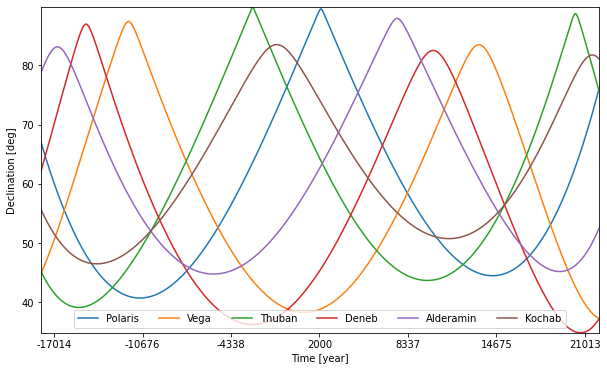

In [12]:
fig,ax = plt.subplots(figsize=(10,6))
for star in star_names:
    ax.plot(df['tt'],df[star],label=star)

ax.legend(loc='lower center',ncol=len(star_names))
ax.set_xlabel("Time [year]")
ax.set_ylabel("Declination [deg]")
ax.margins(0)
MonTime.set_time_ticks(ax)

Check date when star is close to the pole:

In [13]:
for star in star_names:
    imax = df[star].argmax()
    mtime = MonTime(df.iloc[imax].tt)
    print(f"Star {star} will be the closest to the pole at {mtime.datespice} (declination {D2H(df.iloc[imax][star])})")

Star Polaris will be the closest to the pole at 2083-11-07 23:25:59.5813 (declination 89:31:51.354)
Star Vega will be the closest to the pole at 11692 B.C. 10-12 08:20:37.619000 (declination 87:24:10.508)
Star Thuban will be the closest to the pole at 2803 B.C. 11-12 23:35:40.709700 (declination 89:54:19.213)
Star Deneb will be the closest to the pole at 14735 B.C. 08-30 11:40:55.71900 (declination 86:57:22.016)
Star Alderamin will be the closest to the pole at 7569-06-13 07:52:18.7355 (declination 87:55:56.040)
Star Kochab will be the closest to the pole at 1041 B.C. 08-30 22:55:00.192000 (declination 83:30:4.833)


In [7]:
MonTime()

MonTime('2023-10-17 00:57:54.8065'/'2023-10-17 00:57:57')